# Experiment 0: Rat Mapping Step by Step (2D)
### Related to Experiment 1

In this tutorial, we will use the `optim-neurostim` library for a 2D optimization.
We will use a rat dataset, where stimuli delivered in the rat motor cortex are associated with leg muscles responses.
We will optimize the xy position of the stimulation in order to maximize the motor response.

We will visualize the evolution of the estimated response map, the uncertainty of the model and the UCB acquisition function as the optimization progresses.
#### This is a step-by-step analysis of the tutorial presented in Experiment 1, built to facilitate the understanding of the ongoing neurostimulation optimization process.

## Step 1: Download dependencies

In [1]:
from IPython.display import Image, display
from PIL import Image as PIL_Image
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 16} 
matplotlib.rc('font', **font)

In [2]:
%cd ..

C:\Users\P117258\Documents\GitHub\EduOptimNeurostimDev


## Step 2: Download the dataset (if not already done)

In [ ]:
!bash scripts/download_nhp_rat_dataset.sh data

## Step 3: Configuration file

In `optim-neurostim`, the training is orchestrated by a configuration file, a JSON file containing all the necessary parameters.  Some examples of configuration files are available in the `optim-neurostim/examples/` folder.

In this tutorial for Experiment 1, we will be using the configuration file: `optim-neurostim/examples/rat_mapping_2D.json`. This is already downloaded for you in `config` (📁).

Open this file and check our repo `Readme` for more information on some of the key parameters.

## Step 4: Run optimization on one animal

Using the given config file and given that the best hyperparameter value for `kappa` is $3.0$, let's first run optimization on one new animal. We do this by passing `"{'kappa': 3.0}"` or equivalently `output/rat_mapping_2D/best_hyperparams.pkl` (i.e. path to the trained hyperparameter object) to the `-hp` flag. 

Note, in some setups we encountered an "OMP: Error #15" A workaround to that error is running the following two lines (once):


import os \
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#### Please note that the step by step demo is only available for one muscle (nm = 1) and one repetition (nr = 1).  This modality is activated by setting the `-sbs` flag to $True$. Changing the seed `-s` will create diverse examples.

In [3]:
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -op output/rat_mapping_2D_one_animal_step_by_step \
                -hp "{'kappa': 3.0}" \
                -val \
                -nr 1 \
                -sbs True \
                -s 0


Dataset (sub:muscle):  ['rat1_M1_190716:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal_step_by_step.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  1.53it/s]


In [4]:
!python scripts/plot_step_by_step.py -r1 output/rat_mapping_2D_one_animal_step_by_step 

Hooray! Step by step visualization successfully generated!


#### The estimated response map, uncertainty and UCB acquisition function are shown at different queries during the optimization. Queried xy positions are indicated by black dots on the true response map. From the 16th query, the best predicted position is also shown (green dot).

Estimated and uncertainty maps are normalized between 0 and 1 across maps from the entire search. UCB maps are normalized individually.

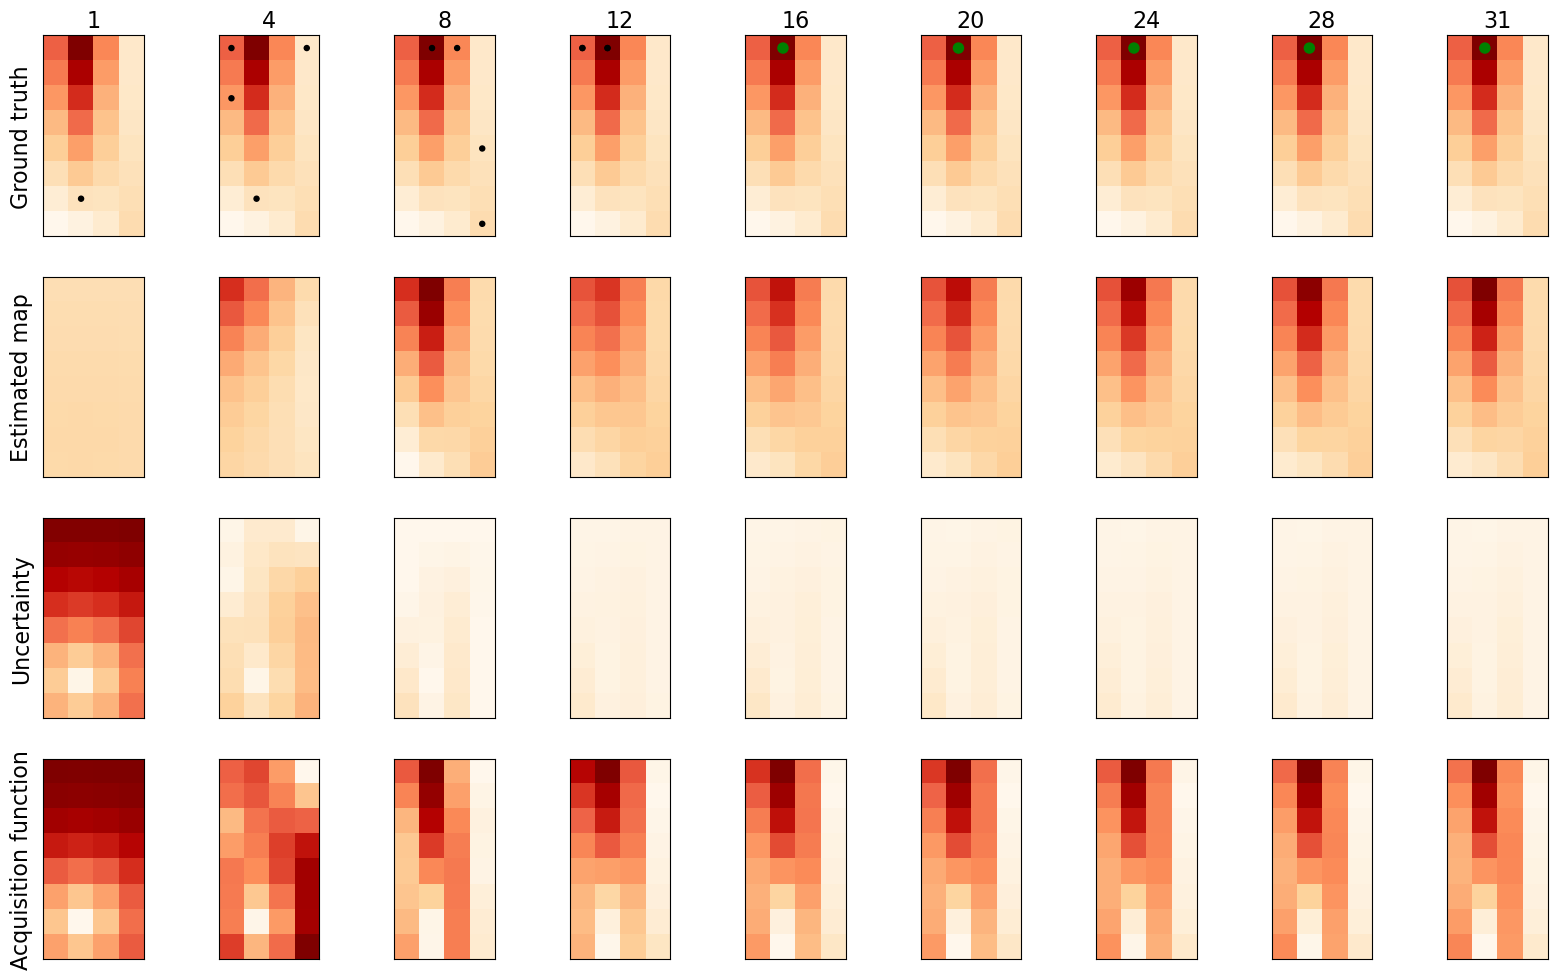

In [5]:
display(Image('output/rat_mapping_2D_one_animal_step_by_step/step_by_step_visualization.png'))

If you used seed $0$, here's a walktrhough the figure above:
#### The first query falls into a portion of the search space that has low value.
There's not much gain in knowledge (estimated map) but we did remove some uncertainty. The overall acquisition function will now be biased toward the upper portion of the input space.

#### Queries 2-4 are more productive, but still miss the most effective portion of the map (dark red).
The top left query is the most effective, and this is shown in the estimated map.

#### Queries 5-8 cover a wider area and manage to find the optimal point.
The algorithm has tightened its focus on the upper part of the input space, without neglecting sporadic searches in largely unexplored areas. The best spot was found and represented in the estimated map. Its expected value dominates the acquisition function, since uncertainty has been reduced everywhere.

#### Queries 9-12: the search now concentrates only on two remaining candidates.
The algorithm continues by converging on the optimal site.

#### Let's change the seed `-s` to $7$.

Dataset (sub:muscle):  ['rat1_M1_190716:5']
Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal_step_by_step.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  1.73it/s]


Hooray! Step by step visualization successfully generated!


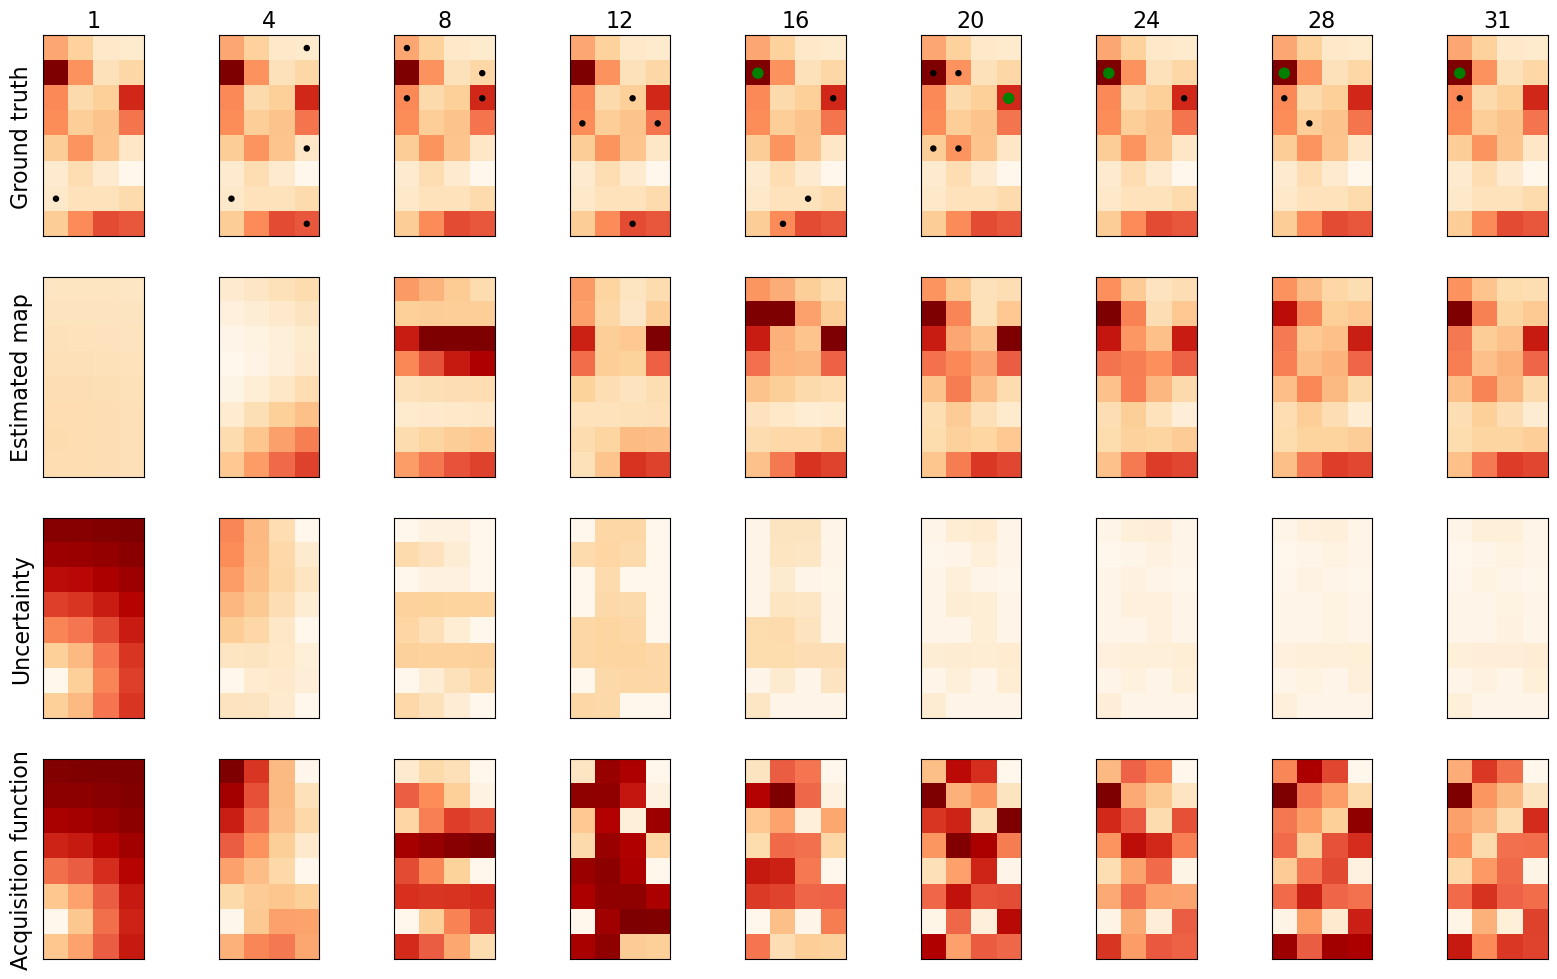

In [6]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -op output/rat_mapping_2D_one_animal_step_by_step \
                -hp "{'kappa': 3.0}" \
                -val \
                -nr 1 \
                -sbs True \
                -s 7

!python scripts/plot_step_by_step.py -r1 output/rat_mapping_2D_one_animal_step_by_step 
display(Image('output/rat_mapping_2D_one_animal_step_by_step/step_by_step_visualization.png'))

Seed $7$, walktrhough:

This ground truth map is more complicated and has at least 3 local maxima. 

#### The first query falls into a portion of the search space that has low value.
There's not much gain in knowledge (estimated map) but we did remove some uncertainty. The overall acquisition function will now be biased toward the upper and right portion of the input space.

#### Queries 2-4 are more productive, but still miss the most effective portion of the map (dark red).
Notice that the third best hotspot was found. This is immediately represented in the estimated map. However, the acquisition function still indicates that multiple areas of the input space are not covered and should be explored.

#### Queries 5-8 cover a wider area and manage to find the second best hotspot.
The algorithm has extended its search on multiple areas of the input space. The second and third best spots were visited and represented in the estimated map. Uncertainty is still high and requires more exploration.

#### Queries 9-12 continue to cover the input space, finding the best hotspot but not yet the single best point.
The best hotspot is represented in the estimated map, but only suboptimal neighbors were visited. The central strip of the input space is highly uncertain, but every sporadic query in this area yields unsatisfactory results.

#### Queries 13-16 the best point is found.
For the first time the best input point is queried, and now dominates the estimated map. The acquisition function indicates the need to keep broadening the search.

#### Queries 17-24 search for the optimal position between the best and second best.
The best and second best positions are repetitively queried. Because of the variability in response, the estimated value of those 2 points is very similar. The algorithm exploits these positions to find the true best.

#### The following queries consolidate this position with repeated tests of the best spot and sporadic queries in uncharted areas.


The algorithm converges on the optimal site.

#### Last, let's try seed `-s` $4$.

Dataset (sub:muscle):  ['rat5_M1_191112:1']
Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal_step_by_step.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  1.34it/s]


Hooray! Step by step visualization successfully generated!


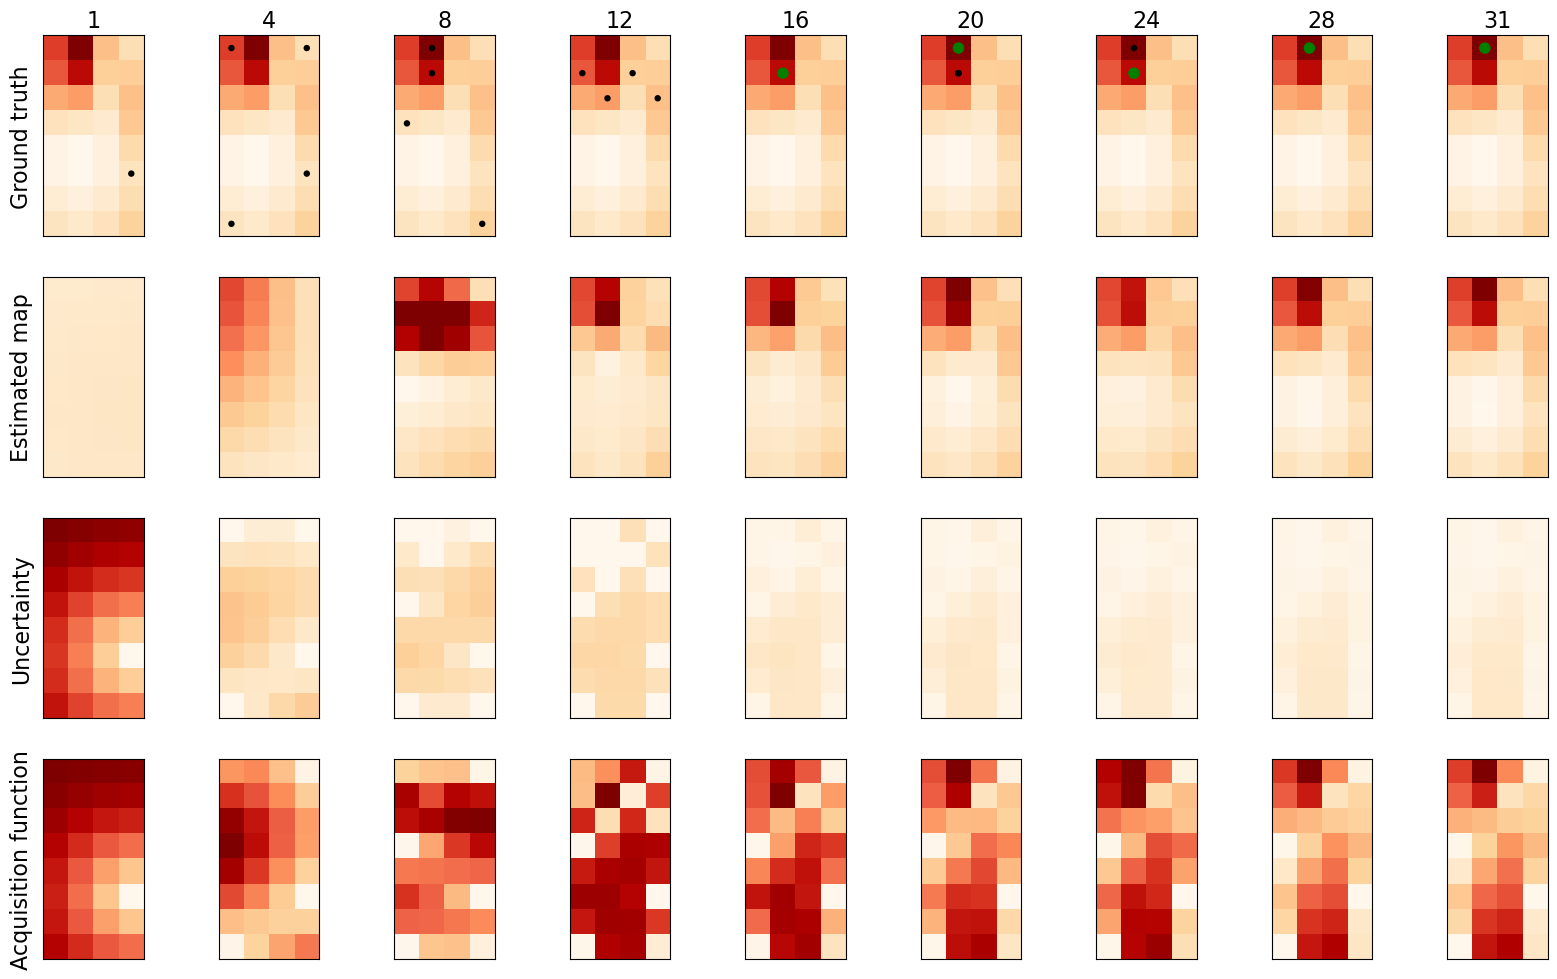

In [7]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -op output/rat_mapping_2D_one_animal_step_by_step \
                -hp "{'kappa': 3.0}" \
                -val \
                -nr 1 \
                -sbs True \
                -s 4

!python scripts/plot_step_by_step.py -r1 output/rat_mapping_2D_one_animal_step_by_step 
display(Image('output/rat_mapping_2D_one_animal_step_by_step/step_by_step_visualization.png'))

Seed $4$, walktrhough:
#### The first query falls into a portion of the search space that has low value.
There's not much gain in knowledge (estimated map) but we did remove some uncertainty. The overall acquisition function will now be biased toward the upper and left portion of the input space.

#### Queries 2-4 are slightly more productive, but still miss the most effective portion of the map (dark red).
The top left one is the most effective, and this is shown in the estimated map.The acquisition function still indicates that multiple areas of the input space are not covered and should be explored.

#### Queries 5-8 cover a wider area and manage to find the best hotspot.
The algorithm has extended its search on multiple areas of the input space. The best hotspot was visited and represented in the estimated map. However, due to the response variability, the second best point performed better than the true best. The algorithm has embedded this information in the estimated map.

#### Queries 9-16 continue to cover the input space.
The best point is not visited again, and the algorithm consolidates the adoption of the second best site as it is considered to be the most performant one.

#### Queries 17-24 search for the optimal position between the two best sites in the hotspot.
The best and second best positions are repetitively queried. Because of the noise, the estimated response for those 2 points is very similar. The algorithm exploits these positions to find the true best.

#### Queries 25-28: the best point is found.
After repeated queries, the optimal point now has an edge in the estimated map. 

#### The following queries consolidate this position.
The algorithm converges on the optimal site.